In [1]:
# Import our module containing helper functions
import gravann

# Core imports
import numpy as np
import pickle as pk
import os
from collections import deque

# pytorch
from torch import nn
import torch

# plotting stuff
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2

# If possible enable CUDA
gravann.enableCUDA()
gravann.fixRandomSeeds()
device = os.environ["TORCH_DEVICE"]
print("Will use device ",device)

C:\Users\josch\miniconda3\envs\geodesynet\lib\site-packages\pyvista\themes.py:130: PyvistaDeprecationWarning: use "dark" instead of "night" theme
  warnings.warn('use "dark" instead of "night" theme', PyvistaDeprecationWarning)


Available devices  1
__pyTorch VERSION: 1.12.1
__CUDNN VERSION: 8302
__Number CUDA Devices: 1
Active CUDA Device: GPU 0
Setting default tensor type to Float32
Will use device  cuda:0


In [2]:
# one of "eros", "bennu", "itokawa", "chryumov-gerasimenko", "planetesimal", "torus", "bennu_nu", "itokawa_nu", "planetesimal_nu"
name_of_gt = "eros"

In [3]:
# We load the ground truth (a mascon model of some body)
with open("mascons/"+name_of_gt+".pk", "rb") as file:
    mascon_points, mascon_masses, mascon_name = pk.load(file)

mascon_points = torch.tensor(mascon_points)
mascon_masses = torch.tensor(mascon_masses)

# Print some information on the loaded ground truth
# (non-dimensional units assumed. All mascon coordinates are thus in -1,1 and the mass is 1)
print("Name: ", mascon_name)
print("Number of mascons: ", len(mascon_points))
print("Total mass: ", sum(mascon_masses))

# Each mascon has a closest neighbour. The least close one is here computed (non dimensional units).
# Its a quantity that is of interest when checking mascon models coming from gravitationally stable aggregates.
print("Maximal minimal distance:",gravann.max_min_distance(mascon_points))

Name:  Eros
Number of mascons:  39554
Total mass:  tensor(1.0000, dtype=torch.float64)
Maximal minimal distance: 0.06402954459190369


Sampling points at altitude
Discarding 7421 of 14744 points in altitude sampler which did not meet requested altitude.
Got  5000  points.
Splitting in left / right hemisphere
Left:  2424  points.
Right:  2576  points.


<IPython.core.display.Javascript object>


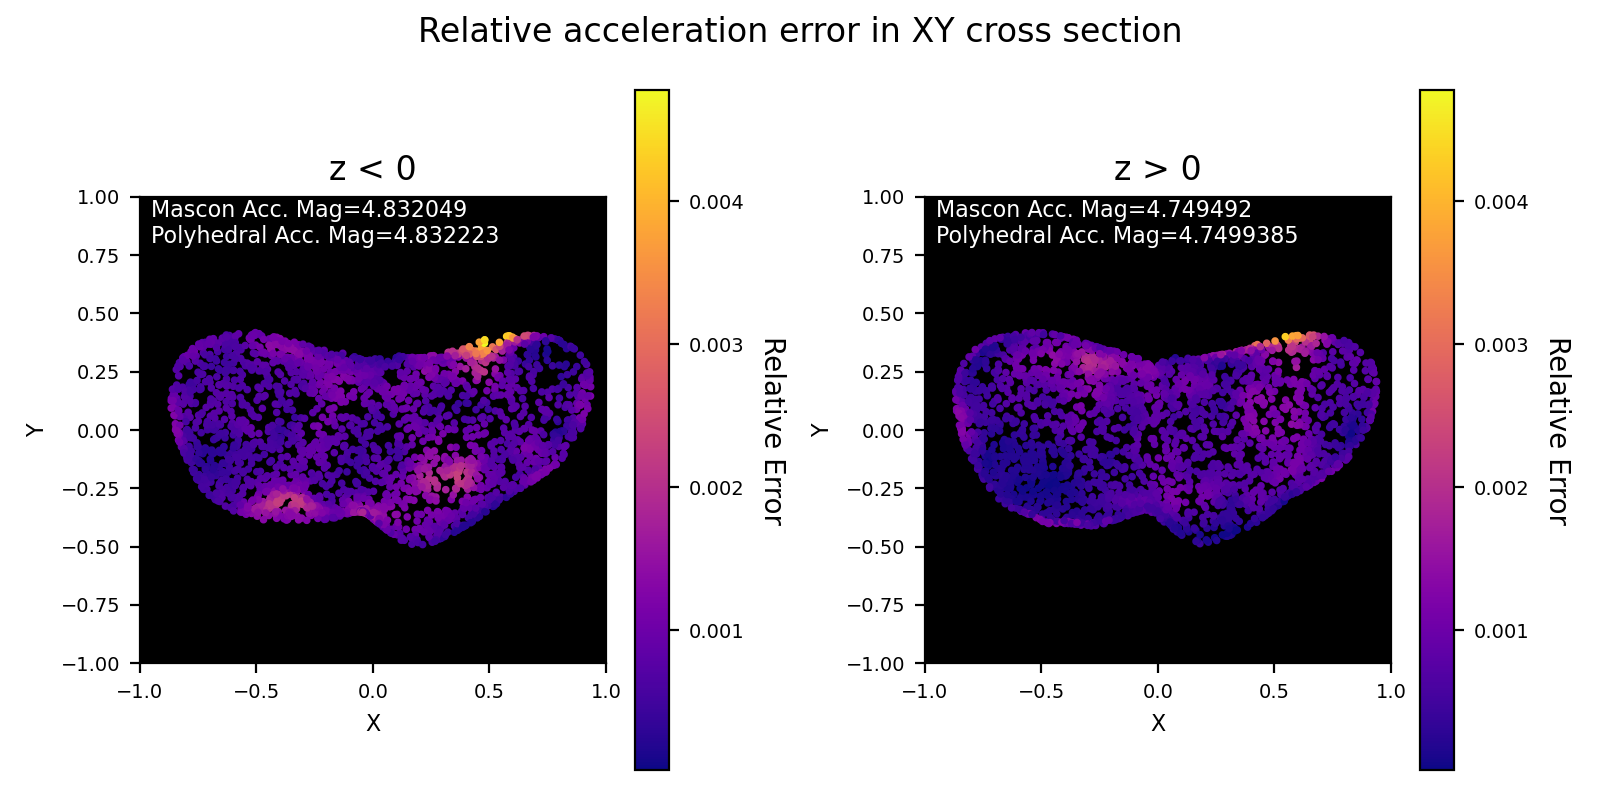

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[ 0.3138,  3.3986, -1.6461],
         [-0.1798, -3.5173, -0.9279],
         [-1.4522,  2.6918, -1.4444],
         ...,
         [ 1.9649,  2.1525, -0.8043],
         [ 0.3305, -3.0591, -1.0279],
         [ 0.3829,  3.8225, -0.9833]]))

In [4]:
gravann.plot_polyhedral_mascon_acceleration("3dmeshes/"+name_of_gt+".pk", mascon_points, mascon_masses, plane="XY", N=5000, logscale=False, altitude=0.1)